Equipo:
Gerardo Leyva Conde,
Emanuel Vidal López

Este es un proyecto para la clase de Reconocimiento de Patrones de la Licenciatura de Ciencias de la Computación en la Universidad de Sonora, impartida por el profesor Julio Waissman.

Se seleccionó este proyecto, porque mientras buscábamos el proyecto en el que podíamos basarnos, encontramos en la plataforma Kaggle la competencia "House Prices: Advanced Regression Techniques"; la cual, en la descripición, indica que es "la competencia perfecta para estudiantes de data science que acaban de completar un curso en línea de aprendizaje máquina y están buscando expandir sus habilidades antes de intentar una competencia destacada". Y notamos que esta descripción nos queda perfectamente a nosotros, porque debido a la pandemia, tuvimos que llevar nuestra materia de Reconocimiento de Patrones en modalidad en línea y para el proyecto final teníamos que resolver un problema con ML que no fuera muy sencillo como el problema del Titanic y no muy complicado como para no poder resolverse en el tiempo restante de el semestre.

Aqui esta el link del repositorio en Github para checar los archivos y encontrar la captura de pantalla de nuestra posicion en el consurso de Kaggle: https://github.com/GerardoLeyvaConde/Proyecto-RP

El problema a resolver es predecir el precio de un hogar en Ames, Iowa utilizando 79 variables explicativas que describen cada aspecto de una casa.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, norm
from scipy import stats
import math

%matplotlib inline

plt.style.use('bmh')

Leemos los datos de entrenamiento

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

Confirmamos que se leeyeron bien los datos

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
c_train = df_train.copy()
c_test = df_test.copy

Para ver el comportamiento de los datos numéricos, que son más fáciles de explorar e interpretar, tomaremos por el momento sólamente los datos de tipo float e int, y quitaremos el índice de estos mismos.

In [6]:
num = c_train.select_dtypes(include=['float64', 'int64'])
del num['Id']
num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Imprimimos los datos dentro de histogramas para poder realizar un primer análisis.

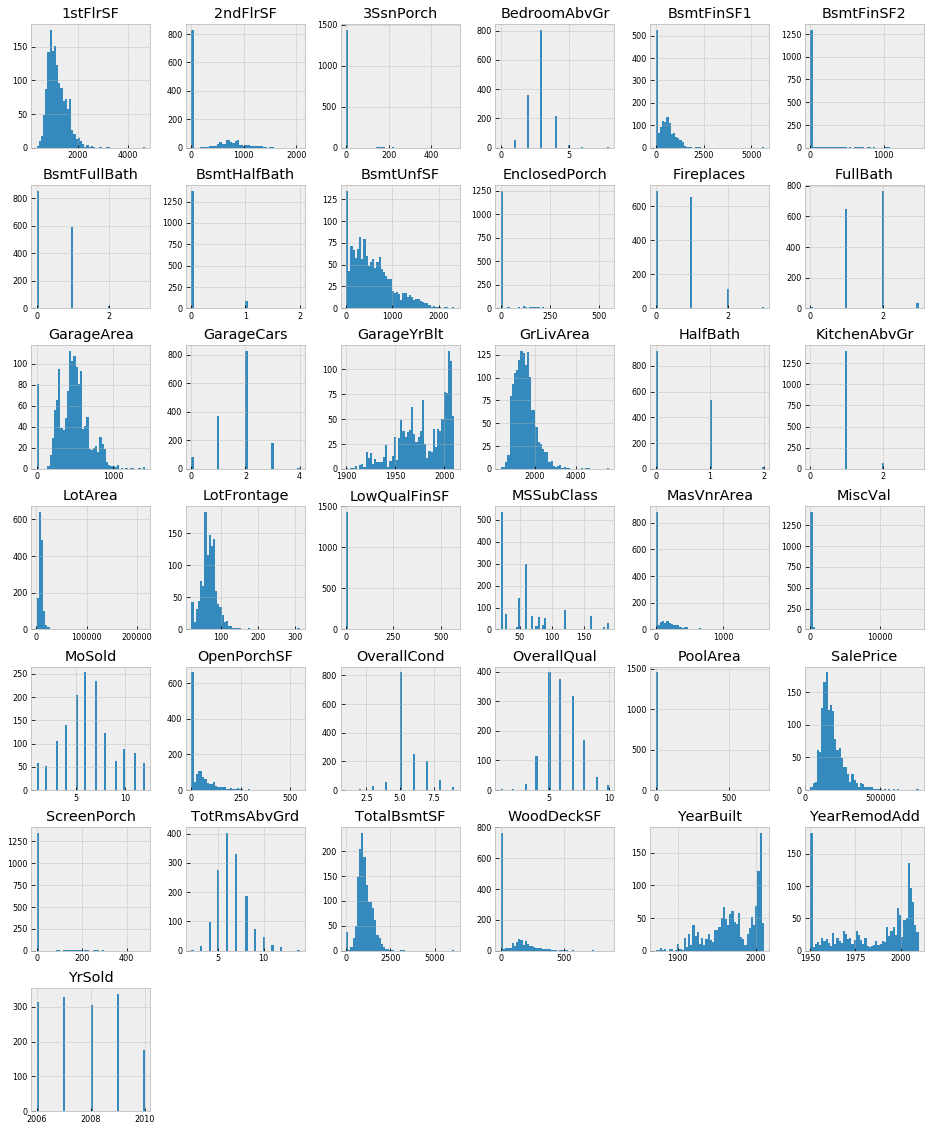

In [7]:
num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Graficaremos los datos para tener una vista inicial de cómo se distribuyen con respecto al campo "SalePrice", que es el campo más importante para resolver el problema.

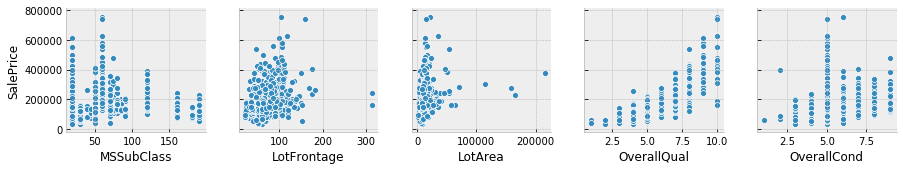

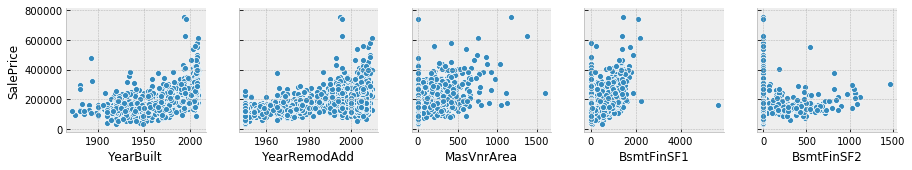

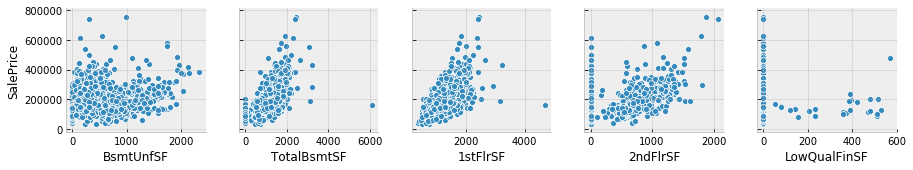

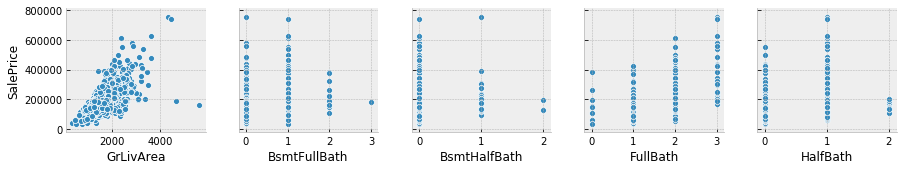

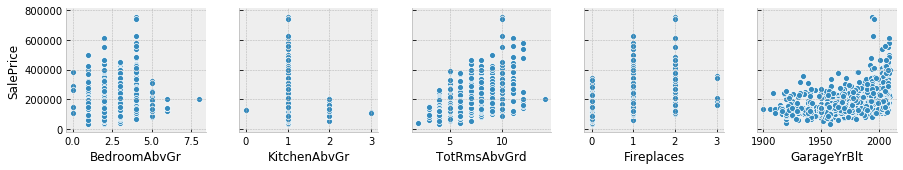

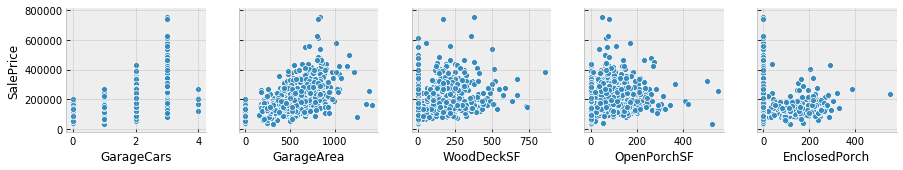

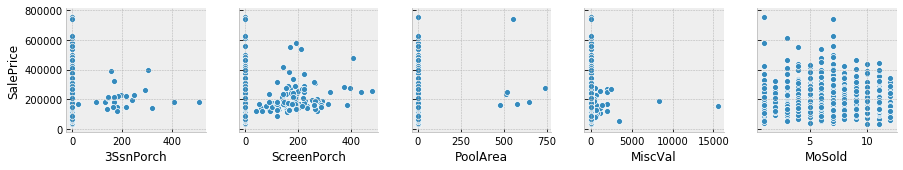

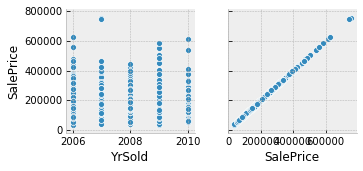

In [8]:
for i in range(0, len(num.columns), 5):
    sns.pairplot(data=num, 
                 x_vars=num.columns[i:i+5], 
                 y_vars=['SalePrice'])

Queremos encontrar qué tipo de distribución le queda mejor a el campo "SalePrice". Podemos observar que no se acomoda a una distribución normal

mu= 180921.19589041095 sigma= 79415.29188606751


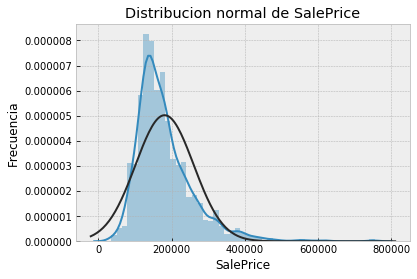

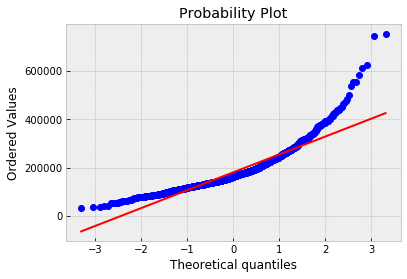

In [9]:
sns.distplot(c_train['SalePrice'], fit=norm);
(mu, sigma) = norm.fit(df_train['SalePrice'])
print("mu= {} sigma= {}".format(mu, sigma))
plt.ylabel('Frecuencia')
plt.title("Distribucion normal de SalePrice")

fig= plt.figure()
res= stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

Pero si la transformamos a una logarítmica, podemos notar que se acomoda muy bien.

mu= 12.024057394918406 sigma= 0.39931245219387496


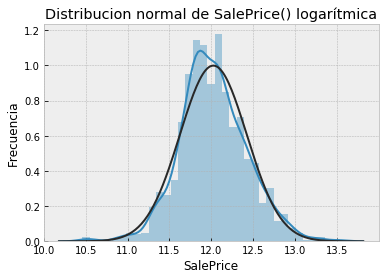

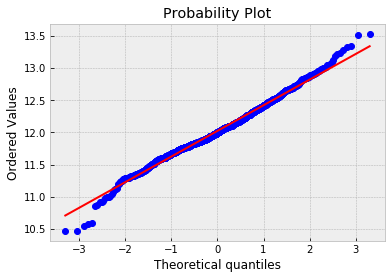

In [10]:
c_train['SalePrice']= np.log1p(c_train['SalePrice'])

sns.distplot(c_train['SalePrice'], fit=norm);
(mu, sigma) = norm.fit(c_train['SalePrice'])
print("mu= {} sigma= {}".format(mu, sigma))
plt.ylabel('Frecuencia')
plt.title("Distribucion normal de SalePrice() logarítmica")

fig= plt.figure()
res= stats.probplot(c_train['SalePrice'], plot=plt)
plt.show()

Volvemos a graficar los datos, pero ahora con nuestra nueva distribución.

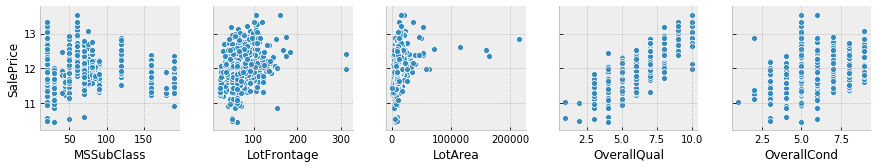

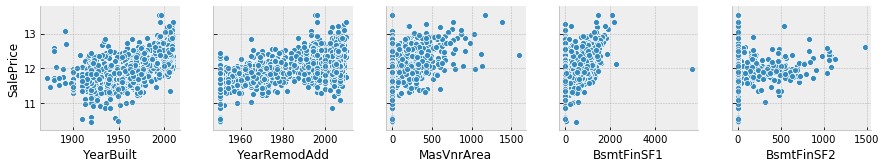

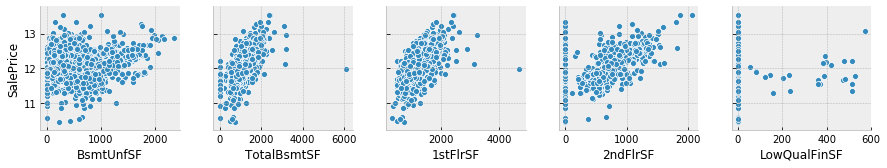

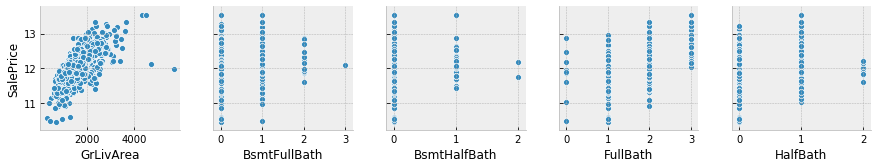

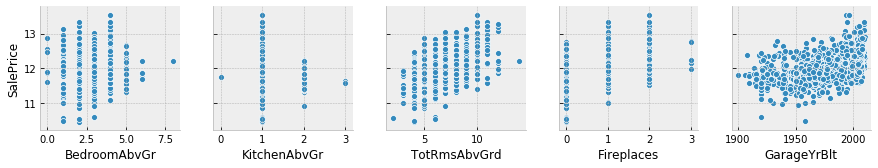

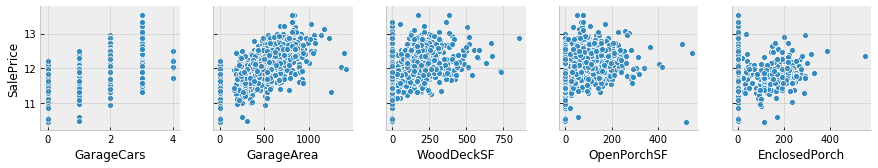

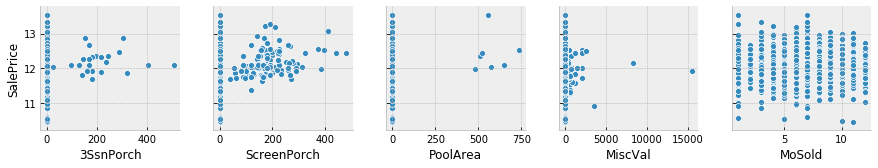

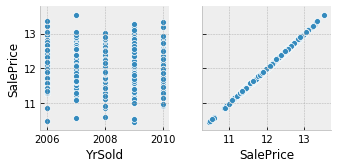

In [11]:
num2 = c_train.select_dtypes(include=['float64', 'int64'])
del num2['Id']

for i in range(0, len(num2.columns), 5):
    sns.pairplot(data=num2, 
                 x_vars=num2.columns[i:i+5], 
                 y_vars=['SalePrice'])

Generamos un heatmap de correlación, para ver qué datos se correlacionan con otros

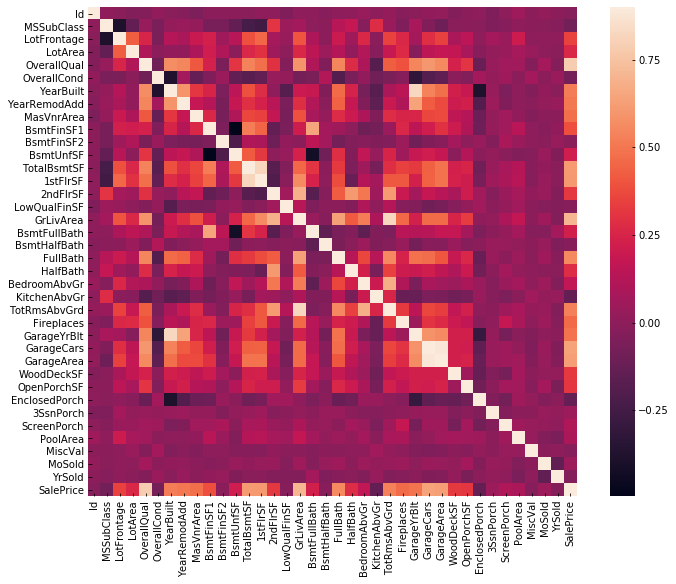

In [12]:
corrmat = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True);

In [13]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.drop(['Id'], axis=1, inplace= True)
df_test.drop(['Id'], axis=1, inplace=True)

In [14]:
df_train.reset_index(drop=True, inplace=True)
df_train['SalePrice']= np.log1p(df_train['SalePrice'])
y= df_train['SalePrice'].reset_index(drop=True)

In [15]:
train= df_train.drop(['SalePrice'], axis=1)
df= pd.concat([train, df_test], sort=False).reset_index(drop=True)

In [16]:
df.shape

(2919, 79)

Mostramos cantidad de datos NaN

In [17]:
df_nan = (df.isnull().sum() / len(df)) * 100
df_nan = df_nan.drop(df_nan[df_nan == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Perdida' :df_nan})
missing_data.head()

,Perdida
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797


Comenzamos a limpiar los datos, aplicándoles el tipo de dato correcto y llenando los tipos NaN con su valor default (Según el archivo de descripción de datos)

In [18]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df['Electrical'] = df['Electrical'].fillna("SBrkr") 
df['KitchenQual'] = df['KitchenQual'].fillna("TA") 
df['PoolQC'] = df['PoolQC'].fillna("None")
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0]) 
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col] = df[col].fillna('None')

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')


# Lo llenamos por el que se repita más
df['MSZoning'] = df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))


# Lo llenamos con la mediana de los datos
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


# Enlistamos todos los tipos de datos no numéricos y los llenamos con 'None'
objetos = []
for i in df.columns:
    if df[i].dtype == object:
        objetos.append(i)

df.update(df[objetos].fillna('None'))


# Llenamos todos los campos vacíos de tipo numérico con 0 
numericos = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeros = []
for i in df.columns:
    if df[i].dtype in numericos:
        numeros.append(i)
df.update(df[numeros].fillna(0))


# Obtenemos los valores de sesgo de los datos
skew_valores = df[numeros].apply(lambda x: skew(x)).sort_values(ascending=False)
max_skew = skew_valores[skew_valores > 0.5]
skew_index = max_skew.index


# Importamos la librería boxcox de scipy para utilizar los segsos obtenidos anteriormente 
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p
for i in skew_index:
    df[i] = boxcox1p(df[i], boxcox_normmax(df[i] + 1))

    
# Aquí quitaremos los campos que no afectan al aprendizaje
df = df.drop(['Utilities', 'Street', 'PoolQC',], axis=1)


# Agrupamos datos que se parezcan
df['YrBltAndRemod']=df['YearBuilt']+df['YearRemodAdd']
df['TotalSF']=df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

df['Total_sqr_footage'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] +
                                 df['1stFlrSF'] + df['2ndFlrSF'])

df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) +
                               df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))

df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] +
                              df['EnclosedPorch'] + df['ScreenPorch'] +
                              df['WoodDeckSF'])

# Simplificamos valores a booleanos (Sí, No)
df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

df.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:3875: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,YrBltAndRemod,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,60,RL,14.663549,13.424521,None,Reg,Lvl,Inside,Gtl,CollgCr,...,4006,1321.691507,1142.715065,3.527460,12.009559,0,1,1,1,0
1,20,RL,16.494886,13.694528,None,Reg,Lvl,FR2,Gtl,Veenker,...,3952,412.852987,152.356409,2.355405,56.339214,0,0,1,1,1
2,60,RL,15.044950,14.034134,None,IR1,Lvl,Inside,Gtl,CollgCr,...,4003,1354.473554,1131.243811,3.527460,9.849185,0,1,1,1,1
3,70,RL,14.008493,13.683422,None,IR1,Lvl,Corner,Gtl,Crawfor,...,3885,1172.823168,957.365275,1.992784,24.933769,0,1,1,1,1
4,60,RL,16.954471,14.550143,None,IR1,Lvl,FR2,Gtl,NoRidge,...,4000,1646.920182,1382.701181,3.527460,56.531535,0,1,1,1,1


Si olvidamos algún campo categórico por cambiar, la función get_dummies() lo hará por nosotros

In [19]:
print(df.shape)
final_df = pd.get_dummies(df).reset_index(drop=True)
print(final_df.shape)

(2919, 86)
(2919, 335)


Declaramos las variables que usaremos para entrenar nuestro modelo

In [20]:
X = final_df.iloc[:len(y), :]
X_sub = final_df.iloc[len(X):, :]

print('X', X.shape, 'y', y.shape, 'X_sub', X_sub.shape)

X (1460, 335) y (1460,) X_sub (1459, 335)


Metemos en una lista todos los datos que puedan provocar sobreaprendizaje y los quitamos del grupo de datos total

In [21]:
sobre_aprendizaje = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.94: # Cambiar
        sobre_aprendizaje.append(i)

sobre_aprendizaje = list(sobre_aprendizaje)
X = X.drop(sobre_aprendizaje, axis=1)
X_sub = X_sub.drop(sobre_aprendizaje, axis=1)

In [22]:
X.shape, y.shape, X_sub.shape

((1460, 333), (1460,), (1459, 333))

Definimos funciones para calcular el Root Mean Square Log Error y Cross Validation Root Mean Square Error

In [23]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

Probamos el modelo de Potenciación de Gradiente e imprimimos la media y la desviación estándar

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', 
                                min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)
score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

gbr: 0.1221 (0.0241)



Probamos el modelo de Regresión de Vector Soporte (SVR) con el kernel de Función de Base Radial (RBF)

In [25]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', gamma='scale', C=10000, epsilon=0.001)
score = cv_rmse(svr)
print("SVR: {:} ({:})\n".format(score.mean(), score.std()))

SVR: 0.14962488877630162 (0.049158710561168426)



Probamos con el modelo de Regresión por Decenso de Gradiente. Podemos observar que no se ajusta a este modelo

In [26]:
from sklearn.linear_model import SGDRegressor

sgd= SGDRegressor(n_iter_no_change=150, penalty=None, eta0=0.001, max_iter=4000)
score = cv_rmse(sgd)
print("SGD: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

SGD: 372579880101194.1250 (217044507519062.3750)



Por último, probamos con el modelo de Regresión por Bosque Aleatorio

In [27]:
from sklearn.ensemble import RandomForestRegressor

rForest = RandomForestRegressor(n_estimators=1000)
score = cv_rmse(rForest)
print("rForest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

rForest: 0.1396 (0.0238)



Entrenamos usando los modelos con los que sí se ajustó aceptablemente

In [28]:
svr_model= svr.fit(X, y)
print('SVR Ejecutado')

gbr_model= gbr.fit(X, y)
print('Gradiente Ejecutado')

rForest_model= rForest.fit(X, y)
print('Bosque aleatorio Ejecutado')

SVR Ejecutado
Gradiente Ejecutado
Bosque aleatorio Ejecutado


Juntamos todos los modelos dentro de una sola función creando una sola función de predicción. A cada modelo de aprendizaje le dimos el porcentaje de uso dependiendo de el error que nos dió al utilizar cada modelo individualmente.

Como el modelo de Potenciación de Gradiente fue el que dió un menor error, le dimos un porcentaje de 50%.
Después, el modelo de Bosque aleatorio fue el que nos dió el segundo lugar de error, por lo que le dimos un porcentaje de 40%.
Al final, el modelo que nos dió un mayor error de estos tres fue el de Vector Soporte, por lo que le dimos un porcentaje de 10%.

Estos valores pueden cambiarse, pero esta combinación es la que nos dió un mejor RMSLE

In [29]:
def prediccionDeModelos(X):
    return ((0.1 * svr_model.predict(X)) + \
            (0.5 * gbr_model.predict(X)) + \
            (0.4 * rForest_model.predict(X)))
print('Root Mean Square Log Error en los datos de aprendizaje:')
print(rmsle(y, prediccionDeModelos(X)))

Root Mean Square Log Error en los datos de aprendizaje:
0.055354141170378304


Llenamos el archivo con el formato que deben de llevar los datos para publicar el resultado

In [30]:
print('Formato de resultado de predicción')
submission = pd.read_csv("sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(prediccionDeModelos(X_sub)))

Formato de resultado de predicción


Exportamos el archivo como CSV

In [31]:
submission.to_csv("submission.csv", index=False)
print('Resultado de predicción guardado en archivo CSV')

Resultado de predicción guardado en archivo CSV


El formato del archivo es: Una columna con el identificador de la casa, Una columna con el precio que se predijo

In [32]:
submission.head()

,Id,SalePrice
0,1461,124483.0
1,1462,158202.0
2,1463,184813.0
3,1464,191530.0
4,1465,188307.0
